In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
raw_data = pd.read_csv('raw_data.csv', delimiter=',')

In [6]:
raw_data.iloc[0:4]

,date,id,name,y_items,y_actual_cost,x_items,x_actual_cost
0,2014-10-01,10G,NHS BRACKNELL AND ASCOT CCG,4,14.09,0,0
1,2014-10-01,03V,NHS CORBY CCG,181,390.10,0,0
2,2014-10-01,10C,NHS SURREY HEATH CCG,249,725.53,0,0
3,2014-10-01,02D,NHS VALE ROYAL CCG,250,874.77,0,0


In [7]:
import requests

In [8]:
raw_data = requests.get('https://openprescribing.net/api/1.0/spending_by_practice/?code=5.1&org=14L&keys=total_listsize&format=json')
if raw_data.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))

In [9]:
raw_data1 = raw_data.json()

In [10]:
raw_data1

[{'items': 417,
  'quantity': 18650,
  'date': '2014-10-01',
  'row_name': 'FIVE OAKS FAMILIY PRACTICE',
  'setting': 4,
  'actual_cost': 2856.64,
  'row_id': 'P84004',
  'ccg': '14L'},
 {'items': 203,
  'quantity': 8165,
  'date': '2014-10-01',
  'row_name': 'THE VALLANCE CENTRE',
  'setting': 4,
  'actual_cost': 919.79,
  'row_id': 'P84005',
  'ccg': '14L'},
 {'items': 357,
  'quantity': 17084,
  'date': '2014-10-01',
  'row_name': 'AILSA CRAIG MEDICAL CENTRE',
  'setting': 4,
  'actual_cost': 2063.74,
  'row_id': 'P84009',
  'ccg': '14L'},
 {'items': 423,
  'quantity': 17154,
  'date': '2014-10-01',
  'row_name': 'THE BORCHARDT MEDICAL CENTRE',
  'setting': 4,
  'actual_cost': 1873.21,
  'row_id': 'P84010',
  'ccg': '14L'},
 {'items': 644,
  'quantity': 28069,
  'date': '2014-10-01',
  'row_name': 'NORTHENDEN GROUP PRACTICE',
  'setting': 4,
  'actual_cost': 2992.22,
  'row_id': 'P84012',
  'ccg': '14L'},
 {'items': 397,
  'quantity': 13958,
  'date': '2014-10-01',
  'row_name': 'RK

In [11]:
data = pd.DataFrame(raw_data1)

In [12]:
columns = data.columns

In [13]:
columns

Index(['actual_cost', 'ccg', 'date', 'items', 'quantity', 'row_id', 'row_name',
       'setting'],
      dtype='object')

In [14]:
columns[6],columns[2]

('row_name', 'date')

In [15]:
data = data.sort_values([columns[2],columns[6]])

In [26]:
data.iloc[1:10]

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting
75,388.59,14L,2014-10-01,116,4482,P84665,AL-SHIFA MEDICAL CENTRE,4
59,46.11,14L,2014-10-01,25,945,P84623,ALEESHAN MEDICAL CENTRE,4
78,1815.39,14L,2014-10-01,463,15731,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,4
63,672.74,14L,2014-10-01,145,5508,P84631,ARTANE MEDICAL CENTRE,4
40,1732.05,14L,2014-10-01,357,16139,P84053,ASHCROFT SURGERY,4
26,1856.54,14L,2014-10-01,306,18261,P84038,ASHVILLE SURGERY,4
23,2493.03,14L,2014-10-01,500,24469,P84034,BARLOW MEDICAL CENTRE,4
22,2158.16,14L,2014-10-01,413,21953,P84033,BEACON MEDICAL CENTRE,4
19,3777.36,14L,2014-10-01,803,33807,P84029,BENCHILL MEDICAL PRACTICE,4


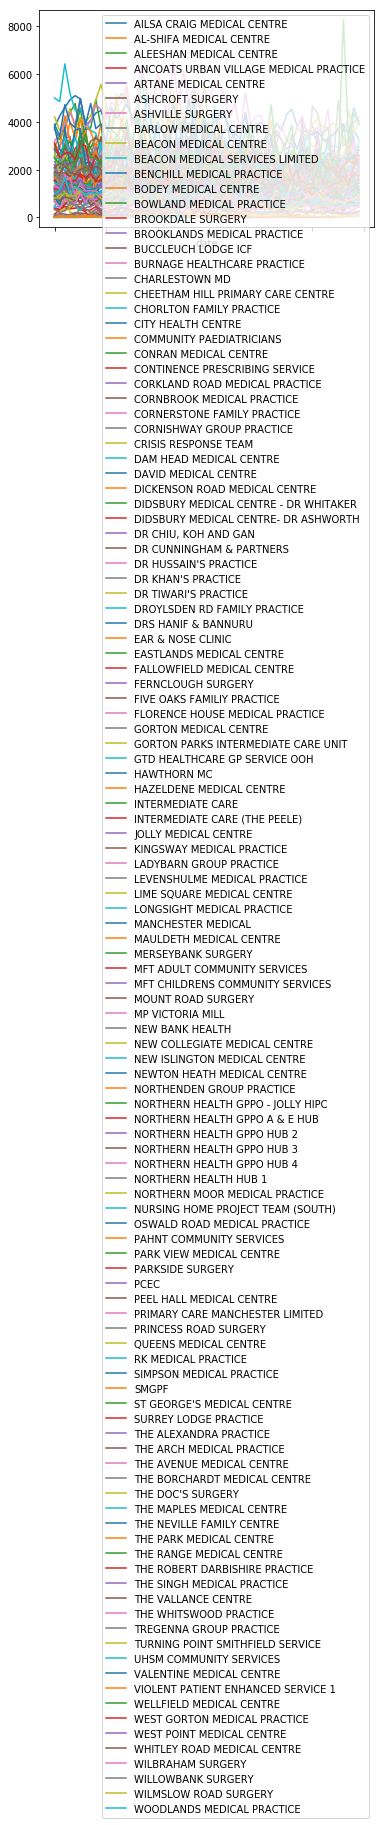

In [17]:
grouped = data.groupby('row_name')
fig, ax = plt.subplots()
for key, group in grouped:
    group.plot('date', 'actual_cost', label=key, ax=ax)

In [31]:
listsize_data = requests.get('https://openprescribing.net/api/1.0/org_details/?org_type=practice&org=14L&keys=total_list_size&format=json')
if raw_data.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))
    
listsize_data = listsize_data.json()
listsize_data = pd.DataFrame(listsize_data)
listsize_data = listsize_data.sort_values([columns[2],columns[6]])

In [32]:
listsize_data.iloc[1:10]

,date,row_id,row_name,total_list_size
74,2014-10-01,P84665,AL-SHIFA MEDICAL CENTRE,2749
59,2014-10-01,P84623,ALEESHAN MEDICAL CENTRE,1297
77,2014-10-01,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,9102
63,2014-10-01,P84631,ARTANE MEDICAL CENTRE,2005
40,2014-10-01,P84053,ASHCROFT SURGERY,8036
26,2014-10-01,P84038,ASHVILLE SURGERY,7899
23,2014-10-01,P84034,BARLOW MEDICAL CENTRE,13424
22,2014-10-01,P84033,BEACON MEDICAL CENTRE,3839
19,2014-10-01,P84029,BENCHILL MEDICAL PRACTICE,9334


In [34]:
merged_data = pd.merge(data, listsize_data, on=['row_name','date','row_id'])

In [36]:
merged_data

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting,total_list_size
0,2063.74,14L,2014-10-01,357,17084,P84009,AILSA CRAIG MEDICAL CENTRE,4,9342
1,388.59,14L,2014-10-01,116,4482,P84665,AL-SHIFA MEDICAL CENTRE,4,2749
2,46.11,14L,2014-10-01,25,945,P84623,ALEESHAN MEDICAL CENTRE,4,1297
3,1815.39,14L,2014-10-01,463,15731,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,4,9102
4,672.74,14L,2014-10-01,145,5508,P84631,ARTANE MEDICAL CENTRE,4,2005
5,1732.05,14L,2014-10-01,357,16139,P84053,ASHCROFT SURGERY,4,8036
6,1856.54,14L,2014-10-01,306,18261,P84038,ASHVILLE SURGERY,4,7899
7,2493.03,14L,2014-10-01,500,24469,P84034,BARLOW MEDICAL CENTRE,4,13424
8,2158.16,14L,2014-10-01,413,21953,P84033,BEACON MEDICAL CENTRE,4,3839
9,3777.36,14L,2014-10-01,803,33807,P84029,BENCHILL MEDICAL PRACTICE,4,9334


In [49]:
def getcombined(CCG, BNF):
    
    linkapi_1 = 'https://openprescribing.net/api/1.0/spending_by_practice/?'
    linkapi_2 = 'https://openprescribing.net/api/1.0/org_details/?org_type=practice'
    code = 'code='
    org = '&org='
    ex = '&keys=total_list_size'
    form = '&format=json'
    
    firstcall = linkapi_1 + code + repr(BNF) + org + CCG + form
    raw_data = requests.get(firstcall)
    
    if raw_data.status_code != 200:
        # This means something went wrong.
        raise ApiError('GET /tasks/ {}'.format(resp.status_code))
    
    secondcall = linkapi_2 + org + CCG + ex + form
    listsize_data = requests.get(secondcall)
    if raw_data.status_code != 200:
        # This means something went wrong.
        raise ApiError('GET /tasks/ {}'.format(resp.status_code))

    data = pd.DataFrame(raw_data.json())
    data = data.sort_values([columns[2],columns[6]])
    listsize_data = pd.DataFrame(listsize_data.json())
    listsize_data = listsize_data.sort_values([columns[2],columns[6]])

    data = pd.merge(data, listsize_data, on=['row_name','date','row_id'])
   
    return(data)

In [50]:
getcombined(CCG='14L', BNF=5.1)

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting,total_list_size
0,2063.74,14L,2014-10-01,357,17084,P84009,AILSA CRAIG MEDICAL CENTRE,4,9342
1,388.59,14L,2014-10-01,116,4482,P84665,AL-SHIFA MEDICAL CENTRE,4,2749
2,46.11,14L,2014-10-01,25,945,P84623,ALEESHAN MEDICAL CENTRE,4,1297
3,1815.39,14L,2014-10-01,463,15731,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,4,9102
4,672.74,14L,2014-10-01,145,5508,P84631,ARTANE MEDICAL CENTRE,4,2005
5,1732.05,14L,2014-10-01,357,16139,P84053,ASHCROFT SURGERY,4,8036
6,1856.54,14L,2014-10-01,306,18261,P84038,ASHVILLE SURGERY,4,7899
7,2493.03,14L,2014-10-01,500,24469,P84034,BARLOW MEDICAL CENTRE,4,13424
8,2158.16,14L,2014-10-01,413,21953,P84033,BEACON MEDICAL CENTRE,4,3839
9,3777.36,14L,2014-10-01,803,33807,P84029,BENCHILL MEDICAL PRACTICE,4,9334
